In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("combined_bike_trips_2023.csv")

In [3]:
df_astro = pd.read_csv("astro-202301-202312.csv")

In [4]:
# Fallback to mixed format inference
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')

# Now extract the date
df['date'] = df['started_at'].dt.date

In [5]:
# Define the date range
start_date = '2023-09-01'
end_date = '2023-11-30'

# Filter the DataFrame
filtered_df = df[(df['started_at'] >= start_date) & (df['started_at'] <= end_date)]
filtered_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date
7617674,BF7400342E7CAA12,classic_bike,2023-09-07 06:41:56.509,2023-09-07 06:52:00.325,E 23 St & 1 Ave,5929.01,W 20 St & 10 Ave,6306.01,40.736502,-73.978095,40.745686,-74.005141,member,2023-09-07
7617675,FF46E654B645790A,classic_bike,2023-09-09 11:46:02.469,2023-09-09 11:54:36.819,W 30 St & 8 Ave,6373.07,W 20 St & 10 Ave,6306.01,40.749653,-73.995208,40.745686,-74.005141,casual,2023-09-09
7617676,B2A614EC7716ECE0,classic_bike,2023-09-09 11:46:26.015,2023-09-09 11:54:31.458,W 30 St & 8 Ave,6373.07,W 20 St & 10 Ave,6306.01,40.749653,-73.995208,40.745686,-74.005141,casual,2023-09-09
7617677,9FB3659976CCE0E8,classic_bike,2023-09-13 18:34:49.720,2023-09-13 18:40:57.401,E 115 St & Lexington Ave,7599.09,Adam Clayton Powell Blvd & W 118 St,7670.09,40.797911,-73.942300,40.804372,-73.951475,member,2023-09-13
7617678,E0A9863FDD4E617A,classic_bike,2023-09-16 14:30:41.907,2023-09-16 14:37:49.937,E 9 St & 5 Ave,5872.10,W 10 St & Washington St,5847.06,40.732759,-73.995817,40.733424,-74.008515,casual,2023-09-16


In [6]:
# Count usage per date in df_cleaned
usage_counts = filtered_df['date'].value_counts().reset_index()
usage_counts.columns = ['Date', 'UsageCount']  # Rename columns for clarity

# Convert 'Date' to datetime if it's not already
usage_counts['Date'] = pd.to_datetime(usage_counts['Date'])

In [7]:
df_astro_focus = df_astro[['Date', 'DayLength']]
df_astro_focus['Date'] =  pd.to_datetime(df_astro_focus['Date'])

C:\Users\angji\AppData\Local\Temp\ipykernel_20412\745916957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_astro_focus['Date'] =  pd.to_datetime(df_astro_focus['Date'])


In [9]:
# Merge the dataframes on 'Date'
merged_df = pd.merge(df_astro_focus, usage_counts, on='Date', how='left')

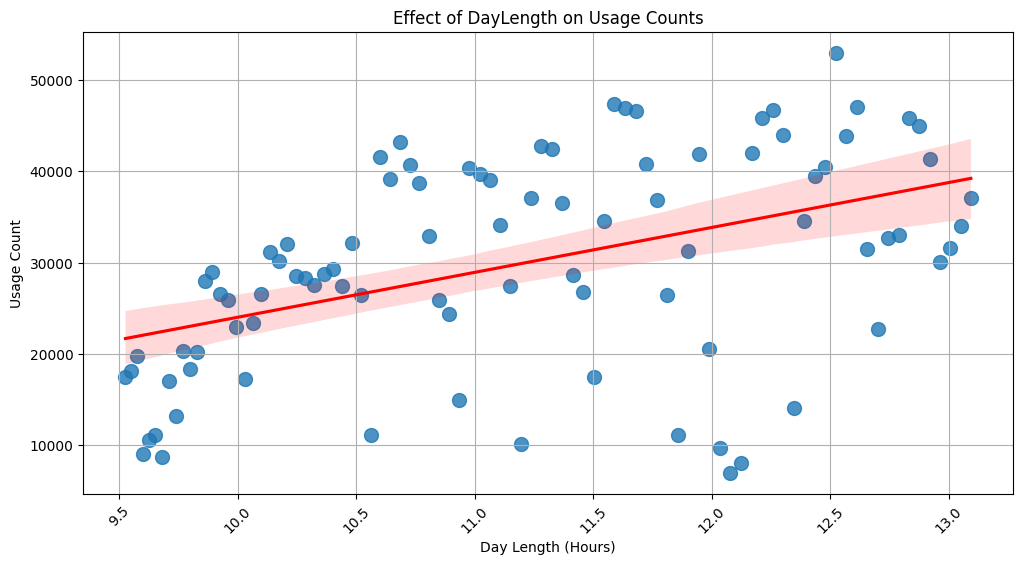

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
merged_df['DayLength'] = pd.to_timedelta(merged_df['DayLength'])

# Convert DayLength to total hours for plotting
merged_df['DayLengthHours'] = merged_df['DayLength'].dt.total_seconds() / 3600

# Plotting with a trend line
plt.figure(figsize=(12, 6))
sns.regplot(data=merged_df, x='DayLengthHours', y='UsageCount', marker='o', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Effect of DayLength on Usage Counts')
plt.xlabel('Day Length (Hours)')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [11]:
import statsmodels.api as sm

# Ensure 'DayLength' is in timedelta format
merged_df['DayLength'] = pd.to_timedelta(merged_df['DayLength'])

# Convert DayLength to total hours for plotting
merged_df['DayLengthHours'] = merged_df['DayLength'].dt.total_seconds() / 3600

# Calculate the correlation
correlation = merged_df['DayLengthHours'].corr(merged_df['UsageCount'])
print(f'Correlation between Day Length (Hours) and Usage Count: {correlation:.2f}')

# Fit the linear regression model
X = sm.add_constant(merged_df['DayLengthHours'])  # Add a constant for the intercept
y = merged_df['UsageCount']
model = sm.OLS(y, X).fit()

# Get the intercept and slope (beta)
intercept = model.params[0]
beta = model.params[1]

print(f'Intercept: {intercept}, Beta (slope): {beta}')

Correlation between Day Length (Hours) and Usage Count: 0.46
Intercept: nan, Beta (slope): nan


C:\Users\angji\AppData\Local\Temp\ipykernel_20412\2390446505.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
C:\Users\angji\AppData\Local\Temp\ipykernel_20412\2390446505.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
